## Brain MRI Project

For this project we will use some images of Brain MRIs and we will build a model that knows how to identify between the 4 classes that the images belong to.

The dataset is from [Kaggle](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset?select=Training). 
<br>It contains 7023 images, belonging to 4 different classes:  glioma - meningioma - no tumor and pituitary.
<br>Let us proceed with our imports and previewing the images.

#### Imports

In [11]:
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pandas as pd
import numpy as np
import os

#### Creating the datasets

In [2]:
# Directory path
train_data_dir = 'dataMRI/Training'
test_data_dir = 'dataMRI/Testing'

# Get all the data in the directory data/test
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir)

# Get all the data in the directory data/train
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir)


# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 1311 images belonging to 4 classes.
Found 5712 images belonging to 4 classes.


Previewing an image from the train set:

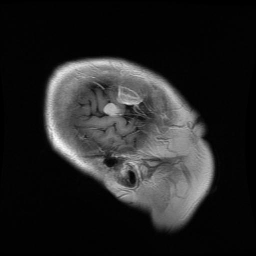

In [3]:
# Preview an image
array_to_img(train_images[0])

Previewing an image from the test set:

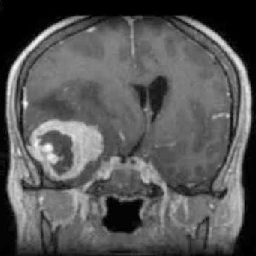

In [4]:
# Preview an image
array_to_img(test_images[0])

Now let us explore more the division among the classes and we will preview one image per class.

In [6]:
test_images.shape

(32, 256, 256, 3)

In [8]:
train_images.shape

(32, 256, 256, 3)

This shows us that the dimension of the imgaes is 256x256 and the sample that was taken from the image generator contains 32 images for train and test.

Now we will generate a dataframe for the train images, first let us look at the classes:

In [9]:
train_generator.class_indices 

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [12]:
dataframe_train=pd.DataFrame(train_labels, columns=['glioma', 'meningioma',\
            'notumor', 'pituitary'])

Let us preview it:

In [14]:
dataframe_train

,glioma,meningioma,notumor,pituitary
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,1.0


Same thing for the test:

In [16]:
test_generator.class_indices 

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [17]:
dataframe_test=pd.DataFrame(test_labels, columns=['glioma', 'meningioma',\
            'notumor', 'pituitary'])

In [18]:
dataframe_test

,glioma,meningioma,notumor,pituitary
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0
6,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0
